<a href="https://colab.research.google.com/github/udityamerit/IIT-INDORE-WORKSHOP-AI-ML-DL/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

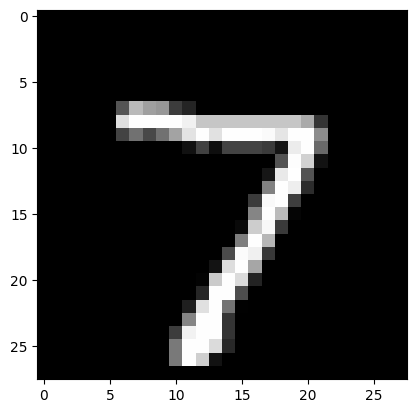

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2645 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1182 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0800 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0595 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0468 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0376 - accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0300 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0207 - accuracy: 0.9939
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0885 

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_t,y_t),(x_te, y_te) = mnist.load_data()
plt.imshow(x_te[0],cmap='gray')
plt.show()
x_t = x_t/255
x_te = x_te /255
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')


])

model.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_t,y_t,epochs=10)
test_loss, test_acc = model.evaluate(x_te,y_te)
print(test_loss*100 , test_acc*100)

In [ ]:
pre = model.predict(x_te)

313/313 [==============================] - 1s 1ms/step


Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1274 - accuracy: 0.9614
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0428 - accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0287 - accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0209 - accuracy: 0.9935
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0166 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0108 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0081 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0074 - accuracy: 0.9975
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss

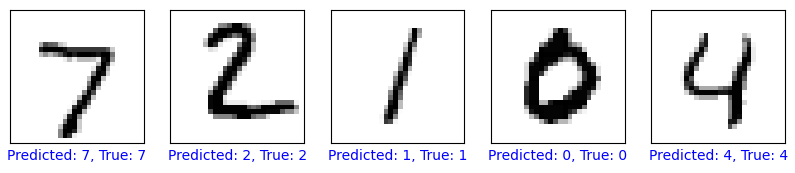

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define a CNN model
model = tf.keras.models.Sequential([
    # First Convolutional Layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten and Dense Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(x_test)

# Function to plot the image along with the predicted and actual labels
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.squeeze(), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Predicted: {predicted_label}, True: {true_label}", color=color)

# Display a few test images with their predicted and actual labels
num_images = 5
plt.figure(figsize=(10, 2))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plot_image(predictions[i], y_test[i], x_test[i])
plt.show()